In [8]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Select images
data_dir = './Datas/images'
batch_size = 32
img_height = 128
img_width = 128

train_ds = keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 48605 files belonging to 2 classes.
Using 38884 files for training.
Found 48605 files belonging to 2 classes.
Using 9721 files for validation.
['ELLIPTICAL', 'SPIRAL']


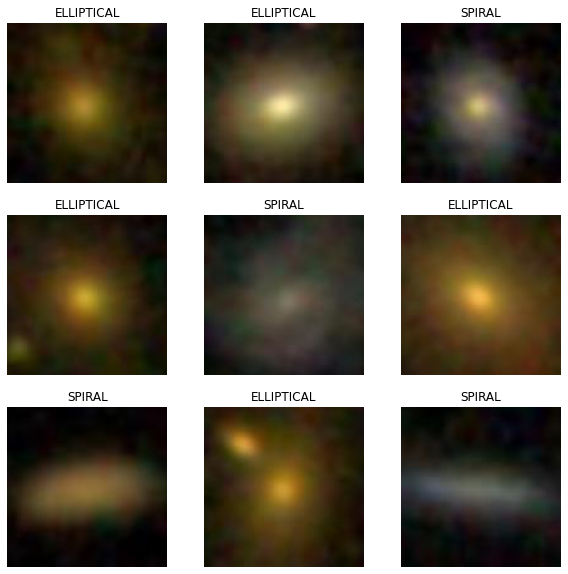

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.show()

In [11]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2, 0.2),
    keras.layers.RandomContrast(0.5)
  ]
)

num_classes = len(class_names)

model = keras.Sequential([
  data_augmentation,
  keras.layers.Rescaling(1./255),
  keras.layers.Conv2D(16, 3, activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 10

history = model.fit(train_ds, epochs=epochs, 
                    validation_data=val_ds)

Epoch 1/10
1216/1216 [==============================] - 120s 98ms/step - loss: 0.2099 - accuracy: 0.9158 - val_loss: 0.1025 - val_accuracy: 0.9632
Epoch 2/10
1216/1216 [==============================] - 132s 109ms/step - loss: 0.1266 - accuracy: 0.9542 - val_loss: 0.0956 - val_accuracy: 0.9648
Epoch 3/10
1216/1216 [==============================] - 136s 112ms/step - loss: 0.1146 - accuracy: 0.9583 - val_loss: 0.0786 - val_accuracy: 0.9723
Epoch 4/10
1216/1216 [==============================] - 121s 100ms/step - loss: 0.1071 - accuracy: 0.9614 - val_loss: 0.0810 - val_accuracy: 0.9708
Epoch 5/10
1216/1216 [==============================] - 1673s 1s/step - loss: 0.1022 - accuracy: 0.9637 - val_loss: 0.0732 - val_accuracy: 0.9739
Epoch 6/10
1216/1216 [==============================] - 128s 105ms/step - loss: 0.0980 - accuracy: 0.9653 - val_loss: 0.0681 - val_accuracy: 0.9759
Epoch 7/10
1216/1216 [==============================] - 129s 106ms/step - loss: 0.0980 - accuracy: 0.9635 - val_los

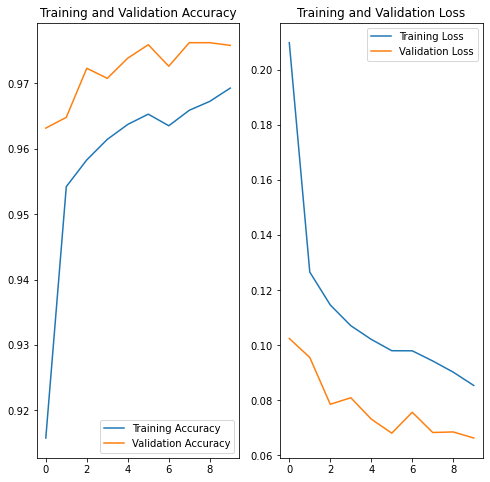

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
"""img = keras.preprocessing.image.load_img("elliptical2.jpg")

img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)"""

This image most likely belongs to SPIRAL with a 96.47 percent confidence.
